In [5]:
import os

root_path = 'Data/VektoriEbart-5/Trening'

corpus = []
classes = []

for class_name in os.listdir(root_path):
    class_dir = os.path.join(root_path, class_name)
    for file_name in os.listdir(class_dir):
        with open(os.path.join(class_dir, file_name)) as f:
            word_counts = {}
            for line in f:
                word, count = line.split()
                word_counts[word] = int(count)
            corpus.append(word_counts)
            classes.append(class_name)
                
    

In [8]:
len(corpus)

3492

In [9]:
len(classes)

3492

In [10]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X = dv.fit_transform(corpus)
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
dv.feature_names_

['ab',
 'abasu',
 'abati',
 'abc',
 'abdul',
 'abdulah',
 'abe',
 'aberdin',
 'abhaziji',
 'abida',
 'aboliranxa',
 'abom',
 'abonmana',
 'abortus',
 'abramovicyu',
 'abrasxevicx',
 'abs',
 'abu',
 'ac',
 'aca',
 'acb',
 'acdi',
 'ace',
 'acetylene',
 'ackovicx',
 'acom',
 'acovicx',
 'acta',
 'acu',
 'acxima',
 'acximov',
 'acximovicx',
 'acxina',
 'acye',
 'acyucene',
 'ad',
 'ada',
 'adaldxize',
 'adamicya',
 'adamovicx',
 'adams',
 'adamson',
 'adana',
 'adancyicx',
 'adaptaciju',
 'adaptiranu',
 'adaptivnost',
 'addicted',
 'adekvanti',
 'adekvatan',
 'adekvatnijeg',
 'adekvatnom',
 'adele',
 'adelman',
 'adem',
 'adenauer',
 'adere',
 'adica',
 'adidas',
 'adidye',
 'adijano',
 'adili',
 'adilija',
 'adios',
 'adis',
 'aditivi',
 'administracija',
 'administrativnih',
 'administrator',
 'admiral',
 'adnan',
 'adolescent',
 'adolfa',
 'adore',
 'adorno',
 'adrana',
 'adrenalin',
 'adresa',
 'adresom',
 'adria',
 'adriakoop',
 'adrijano',
 'ads',
 'adut',
 'adventiskicyke',
 'adven

In [13]:
import pandas as pd

df = pd.DataFrame(X.toarray(), columns=dv.feature_names_)
df

,ab,abasu,abati,abc,abdul,abdulah,abe,aberdin,abhaziji,abida,aboliranxa,abom,abonmana,abortus,abramovicyu,abrasxevicx,abs,abu,ac,aca,acb,acdi,ace,acetylene,ackovicx,acom,acovicx,acta,acu,acxima,acximov,acximovicx,acxina,acye,acyucene,ad,ada,adaldxize,adamicya,adamovicx,adams,adamson,adana,adancyicx,adaptaciju,adaptiranu,adaptivnost,addicted,adekvanti,adekvatan,adekvatnijeg,adekvatnom,adele,adelman,adem,adenauer,adere,adica,adidas,adidye,adijano,adili,adilija,adios,adis,aditivi,administracija,administrativnih,administrator,admiral,adnan,adolescent,adolfa,adore,adorno,...,zxizxeka,zxizxicx,zxizxovicx,zxizxu,zxjelena,zxkk,zxlezdi,zxmarce,zxmigija,zxmirecxi,zxmirkave,zxmukicx,zxoao,zxob,zxoelbi,zxolt,zxonglere,zxordija,zxorzxa,zxosep,zxosue,zxovi,zxoze,zxrebanxe,zxrebom,zxrebu,zxrece,zxrtava,zxrtvama,zxrtve,zxrtvom,zxrtvovano,zxrtvujem,zxsrbijagasa,zxtpa,zxuana,zxuborenxa,zxucxe,zxucyan,zxucyi,zxucyne,zxude,zxudecxi,zxudnxom,zxuli,zxulija,zxulxa,zxumance,zxunicx,zxuninxo,zxunior,zxupa,zxupana,zxupaniji,zxupanijskim,zxuplxanina,zxurba,zxurci,zxure,zxurecxi,zxuricx,zxurimo,zxuriti,zxurke,zxurnala,zxurno,zxustel,zxustrine,zxustro,zxuticx,zxutih,zxutilovine,zxuto,zxutra,zxuzxa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, classes, test_size=0.3, random_state=42)
X_train.shape

(2444, 36830)

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8835877862595419

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.7395038167938931

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.5696564885496184

In [18]:
df = pd.read_csv('Data/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
X = df.drop('variety', axis=1)
y = df['variety']
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(105, 4)

In [25]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(20, 5), 
    activation='relu',
    solver='adam',
    max_iter=1000
)
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

1.0

In [29]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Data/iris.csv')

X = df.drop('variety', axis=1)
y = df['variety']

feature_names = list(X.columns)
scalar = StandardScaler()

X = pd.DataFrame(scalar.fit_transform(X), columns=feature_names)
X

,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

pca_names = [f'pca_{i}' for i in range(pca.n_components_)]
pca_names

['pca_0', 'pca_1', 'pca_2', 'pca_3']

In [33]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [35]:
X_transformed = pd.DataFrame(pca.transform(X), columns=pca_names)
X_transformed

,pca_0,pca_1,pca_2,pca_3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


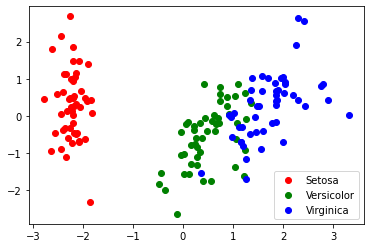

In [50]:
import matplotlib.pyplot as plt

class_names = pd.unique(y).tolist()

colors = ['red', 'green', 'blue']

for i, class_name in enumerate(class_names):
    class_instances = X_transformed.iloc[y[y==class_name].index]

    plt.scatter(class_instances['pca_0'], class_instances['pca_1'], color=colors[i], label=class_name)
plt.legend()